# Transaction

In [ ]:
import warnings 
warnings.filterwarnings("ignore", category = FutureWarning)

In [ ]:
!cp /content/drive/MyDrive/KPMG_VI_New_raw_data_update_final.xlsx /content

In [ ]:
import pandas as pd 
import numpy as np 

In [ ]:
transact_df = pd.read_excel("/content/KPMG_VI_New_raw_data_update_final.xlsx", sheet_name = "Transactions", skiprows = [0], parse_dates= ["transaction_date"])

In [ ]:
transact_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [ ]:
transact_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [ ]:
transact_df.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,19640.000000,20000.000000,19803.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,0.500458,1107.829449,556.046951,38199.776549
std,5773.647028,30.75359,1011.951046,0.500013,582.825242,405.955660,2875.201110
min,1.000000,0.00000,1.000000,0.000000,12.010000,7.210000,33259.000000
25%,5000.750000,18.00000,857.750000,0.000000,575.270000,215.140000,35667.000000
50%,10000.500000,44.00000,1736.000000,1.000000,1163.890000,507.580000,38216.000000
75%,15000.250000,72.00000,2613.000000,1.000000,1635.300000,795.100000,40672.000000
max,20000.000000,100.00000,5034.000000,1.000000,2091.470000,1759.850000,42710.000000


In [ ]:
for col_name in transact_df.columns[4:10]:
    print(f"Unique values in {col_name} : {transact_df[col_name].unique()}")

Unique values in online_order : [ 0.  1. nan]
Unique values in order_status : ['Approved' 'Cancelled']
Unique values in brand : ['Solex' 'Trek Bicycles' 'OHM Cycles' 'Norco Bicycles' 'Giant Bicycles'
 'WeareA2B' nan]
Unique values in product_line : ['Standard' 'Road' 'Mountain' 'Touring' nan]
Unique values in product_class : ['medium' 'low' 'high' nan]
Unique values in product_size : ['medium' 'large' 'small' nan]


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

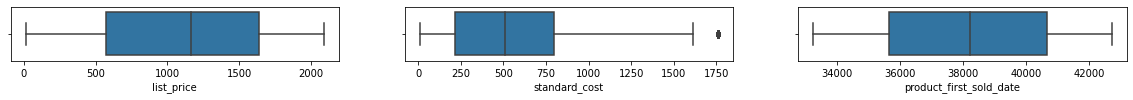

In [ ]:
fig, axe = plt.subplots(1, 3, figsize = (20, 1))
sns.boxplot(transact_df["list_price"], ax = axe[0])
sns.boxplot(transact_df["standard_cost"], ax = axe[1])
sns.boxplot(transact_df["product_first_sold_date"], ax = axe[2])

In [ ]:
transact_df[transact_df["standard_cost"] > 1650]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
59,60,60,3473,2017-12-18,0.0,Approved,Giant Bicycles,Standard,high,small,1977.36,1759.85,41848.0
142,143,60,2135,2017-01-26,1.0,Approved,Giant Bicycles,Standard,high,small,1977.36,1759.85,41047.0
291,292,64,3380,2017-10-28,0.0,Approved,Giant Bicycles,Standard,high,small,1977.36,1759.85,42172.0
412,413,60,720,2017-09-09,0.0,Approved,Giant Bicycles,Standard,high,small,1977.36,1759.85,41848.0
698,699,60,1535,2017-08-13,0.0,Approved,Giant Bicycles,Standard,high,small,1977.36,1759.85,40779.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19190,19191,60,3411,2017-06-23,0.0,Approved,Giant Bicycles,Standard,high,small,1977.36,1759.85,40410.0
19551,19552,64,844,2017-08-09,0.0,Approved,Giant Bicycles,Standard,high,small,1977.36,1759.85,40779.0
19705,19706,60,54,2017-10-24,0.0,Approved,Giant Bicycles,Standard,high,small,1977.36,1759.85,42172.0
19722,19723,60,1841,2017-01-03,1.0,Approved,Giant Bicycles,Standard,high,small,1977.36,1759.85,40779.0


In [ ]:
transact_df[transact_df["standard_cost"] > transact_df["list_price"]]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date


In [ ]:
transact_df[transact_df["brand"].isnull()]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
136,137,0,431,2017-09-23,0.0,Approved,NaN,NaN,NaN,NaN,1942.61,NaN,NaN
159,160,0,3300,2017-08-27,0.0,Approved,NaN,NaN,NaN,NaN,1656.86,NaN,NaN
366,367,0,1614,2017-03-10,0.0,Approved,NaN,NaN,NaN,NaN,850.89,NaN,NaN
406,407,0,2559,2017-06-14,1.0,Approved,NaN,NaN,NaN,NaN,710.59,NaN,NaN
676,677,0,2609,2017-07-02,0.0,Approved,NaN,NaN,NaN,NaN,1972.01,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19340,19341,0,443,2017-12-26,1.0,Approved,NaN,NaN,NaN,NaN,744.54,NaN,NaN
19383,19384,0,2407,2017-06-11,0.0,Approved,NaN,NaN,NaN,NaN,1098.18,NaN,NaN
19793,19794,0,2860,2017-01-13,0.0,Approved,NaN,NaN,NaN,NaN,868.56,NaN,NaN
19859,19860,0,2468,2017-06-24,1.0,Approved,NaN,NaN,NaN,NaN,1497.43,NaN,NaN


In [ ]:
transact_df.duplicated().any()

False

# New Customer List

In [ ]:
import pandas as pd

In [ ]:
new_customer_df = pd.read_excel("/content/KPMG_VI_New_raw_data_update_final.xlsx", sheet_name= "NewCustomerList", skiprows=[0], parse_dates= ["DOB"])

In [ ]:
new_customer_df.head(1)

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,0.56,0.7,0.875,0.74375,1,1,1.71875


**Unnamed Columns**

In [ ]:
new_customer_df.last_name = new_customer_df.last_name.fillna(" ")

In [ ]:
new_customer_df.first_name = new_customer_df.first_name.str.cat(new_customer_df.last_name, sep = " ")

In [ ]:
new_customer_df = new_customer_df.rename(columns = {"first_name": "customer_name"})

In [ ]:
new_customer_df.drop("last_name", axis = 1, inplace = True)

In [ ]:
new_customer_df["customer_age_now"]  = 2021.0 - new_customer_df.DOB.dt.year

In [ ]:
new_customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_name                        1000 non-null   object        
 1   gender                               1000 non-null   object        
 2   past_3_years_bike_related_purchases  1000 non-null   int64         
 3   DOB                                  983 non-null    datetime64[ns]
 4   job_title                            894 non-null    object        
 5   job_industry_category                835 non-null    object        
 6   wealth_segment                       1000 non-null   object        
 7   deceased_indicator                   1000 non-null   object        
 8   owns_car                             1000 non-null   object        
 9   tenure                               1000 non-null   int64         
 10  address      

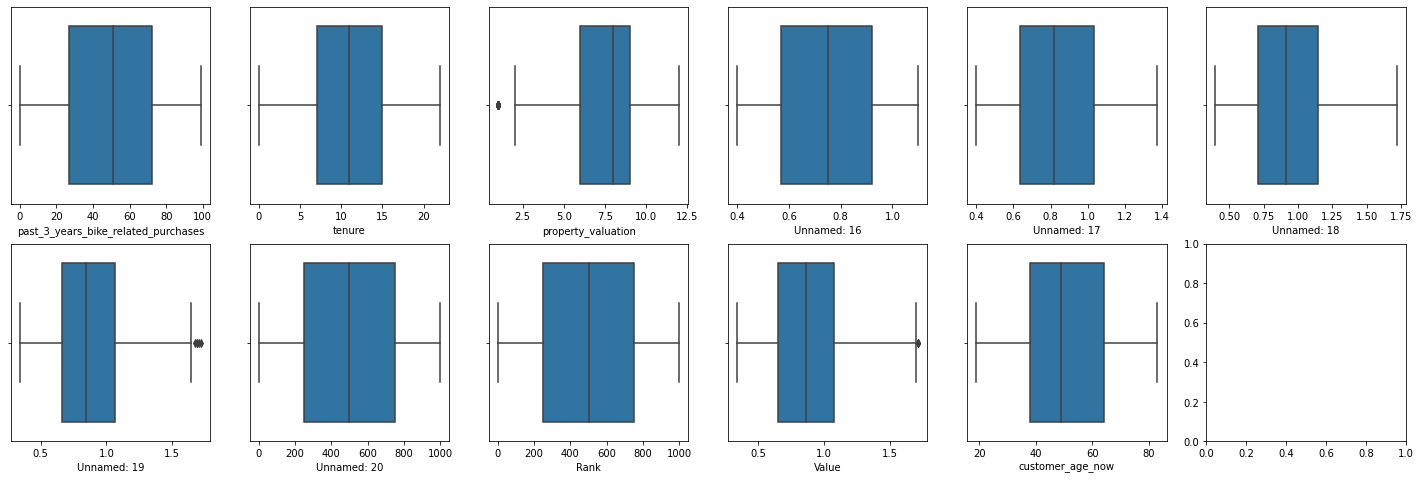

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axe = plt.subplots(2,6, figsize = (25, 8) )

for i, col in enumerate(["past_3_years_bike_related_purchases", "tenure", "property_valuation", "Unnamed: 16", "Unnamed: 17",
                         "Unnamed: 18", "Unnamed: 19", "Unnamed: 20", "Rank", "Value", "customer_age_now"]):
    if i < 6:
        sns.boxplot(new_customer_df[col], ax = axe[0][i])
    else:
        i = i-6
        sns.boxplot(new_customer_df[col], ax = axe[1][i])


In [ ]:
for col in ["gender", "job_industry_category", "wealth_segment", "deceased_indicator", "owns_car", "state", "country"]:
    print(f"Unique values in '{col}' column   :    {new_customer_df[col].unique()}")

Unique values in 'gender' column   :    ['Male' 'Female' 'U']
Unique values in 'job_industry_category' column   :    ['Manufacturing' 'Property' 'Financial Services' 'Entertainment' 'Retail'
 'IT' 'Telecommunications' 'Health' nan 'Argiculture']
Unique values in 'wealth_segment' column   :    ['Mass Customer' 'Affluent Customer' 'High Net Worth']
Unique values in 'deceased_indicator' column   :    ['N']
Unique values in 'owns_car' column   :    ['Yes' 'No']
Unique values in 'state' column   :    ['QLD' 'NSW' 'VIC']
Unique values in 'country' column   :    ['Australia']


In [ ]:
new_customer_df.duplicated().any()

False

# Customer Demographic

In [ ]:
customer_demograph_df = pd.read_excel("/content/KPMG_VI_New_raw_data_update_final.xlsx", sheet_name= "CustomerDemographic", skiprows=[0], parse_dates= ["DOB"])

In [ ]:
customer_demograph_df.head(3)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0


**Default column has values with coded letters other than UTF-8**

In [ ]:
customer_demograph_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [ ]:
customer_demograph_df["customer_age_now"] = 2021.0 - customer_demograph_df["DOB"].dt.year

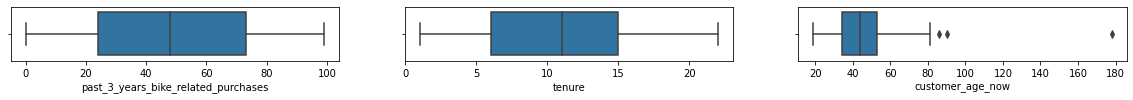

In [ ]:
fig, axe = plt.subplots(1, 3, figsize = (20, 1))

sns.boxplot(customer_demograph_df["past_3_years_bike_related_purchases"], ax = axe[0])
sns.boxplot(customer_demograph_df["tenure"], ax = axe[1])
sns.boxplot(customer_demograph_df["customer_age_now"], ax = axe[2])

In [ ]:
customer_demograph_df[customer_demograph_df["customer_age_now"] > 100]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,customer_age_now
33,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,NaN,No,20.0,178.0


In [ ]:
customer_demograph_df.columns


Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure', 'customer_age_now'],
      dtype='object')

In [ ]:
for col in [ 'gender', 'job_industry_category', 'wealth_segment', 'deceased_indicator', 'owns_car']:
    print(f"Unique Values in '{col}' column         :            {customer_demograph_df[col].unique()}")

Unique Values in 'gender' column         :            ['F' 'Male' 'Female' 'U' 'Femal' 'M']
Unique Values in 'job_industry_category' column         :            ['Health' 'Financial Services' 'Property' 'IT' nan 'Retail' 'Argiculture'
 'Manufacturing' 'Telecommunications' 'Entertainment']
Unique Values in 'wealth_segment' column         :            ['Mass Customer' 'Affluent Customer' 'High Net Worth']
Unique Values in 'deceased_indicator' column         :            ['N' 'Y']
Unique Values in 'owns_car' column         :            ['Yes' 'No']


In [ ]:
customer_demograph_df.duplicated().any()

False

# Addresses

In [ ]:
address_df = pd.read_excel("/content/KPMG_VI_New_raw_data_update_final.xlsx", sheet_name= "CustomerAddress", skiprows= [0])

In [ ]:
address_df.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [ ]:
address_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [ ]:
print(f"Unique values of state in address : {address_df.state.unique()}")
print(f"Unique values of country in address : {address_df.country.unique()}")



Unique values of state in address : ['New South Wales' 'QLD' 'VIC' 'NSW' 'Victoria']
Unique values of country in address : ['Australia']
